# Probablistic Matrix Multiplication Equality

This is a simple probabilistic algorithm that checks whether the product of two matrices $B, C$ is equal to some other matrix $A$. The idea is that, by probabilistic checking random vectors, we can easily find out whether they map to the same element, and we can do that faster than doing the matrix multiplication

In [36]:
N = 100

# We use here some matrices over the rational, but other fields work as well
M = MatrixSpace(QQ, N)

# The space of vectors over rational with n rows
V = MatrixSpace(QQ, N, 1)

B = M.random_element()
C = M.random_element()
A = M.random_element()

Now, we can move onto the probabilistic version, we select some vectors over $V$, and check whether it is mapped to the same vectors

In [37]:
v = V.random_element()

A*v == B*(C * v)

False

## Experiment

Now we will run the same experiment in series, with both succeeding and failing input. 

In [38]:
# The number of experiments we take
R = 10000


def generate_random(M):
    A = M.random_element()
    B = M.random_element()
    C = M.random_element()
    return A, B, C

def generate_equal(M):
    B = M.random_element()
    C = M.random_element()
    return B*C, B, C

def generate_similar(M):
    B = M.random_element()
    C = M.random_element()
    A = B*C
    i, j = randrange(0, N) , randrange(0, N)
    A[i, j] = A[i, j] + 1
    return A, B, C

def equality_test(A, B, C, V):
    v = V.random_element()
    return A*v == B*(C * v)

# F is a field, N is the num of rows, cols of A, B, C. R is total runs, K is repetion of each run

def experiment(F, matrix_gen, N, R, K):
    success_count = 0
    M = MatrixSpace(F, N)
    V = MatrixSpace(F, N, 1)
    for i in range(0, N):
        A, B, C = matrix_gen(M)
        # Repeat the experiment multiple times
        failure = False
        for j in range(0, K):
            if not equality_test(A, B, C, V):
                failure = True
                break
        success_count += not failure
    return success_count / N


First of all, we check over the rational the probability that random elements satisfy the test, which should be extremely low

In [39]:
experiment(QQ, generate_random, N, R, 1)

0

We do the same for equal matrices, which should yield one, and for similar matrices, which we expect fooling the result quite often

In [40]:
equal = experiment(QQ, generate_equal, N, R, 1)
similar = experiment(QQ, generate_similar, N, R, 1)
equal, similar

(1, 21/50)

A similar experiment run using $\mathbb{GF}(17)$ yields the following results

In [41]:
random = experiment(GF(17), generate_random, N, R, 1)
equal = experiment(GF(17), generate_equal, N, R, 1)
similar = experiment(GF(17), generate_similar, N, R, 1)
random, equal, similar

(0, 1, 3/100)

In particular, we would like to focus on the similar case, as it is the one that "fools" the method most often. In fact we can repeat the experiment and reduce the error exponentially (in terms of $k$). In particular we do this for both matrices over rational and over the field $\mathbb{GF}(17)$

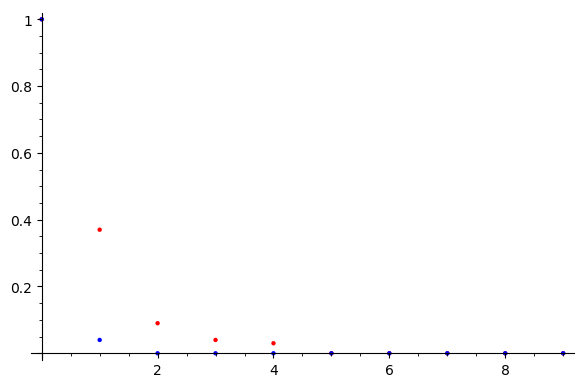

In [42]:
plot_rational = list_plot([experiment(QQ, generate_similar, N, R, k) for k in range(0, 10)], color='red')
plot_gf = list_plot([experiment(GF(19), generate_similar, N, R, k) for k in range(0, 10)], color='blue')

plot_rational + plot_gf

Furthermore, we can also 3d plot it with the dimension, and result with the following (interesting?) plot (Which also does not work on Windows)

In [43]:
n = 10
m = matrix(RDF, n, [experiment(QQ, generate_similar, N, R, K) for K in [0, 10] for N in [1, n+1]])
list_plot3d(m, color='yellow').plot()

Graphics3d Object